In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Utils funcs


In [2]:
def generate_data(x1_pos, x2_pos, x3_pos, n_sample, test_raito=0.3):
    cov = [[1, 0], [0, 1]]
    
    # Generate tthree sets of data point and label
    X0 = np.random.multivariate_normal(x1_pos, cov, n_sample)
    X1 = np.random.multivariate_normal(x2_pos, cov, n_sample)
    X2 = np.random.multivariate_normal(x3_pos, cov, n_sample)
    
    label = np.asarray([0]*n_sample + [1]*n_sample + [2]*n_sample).T
    
    # Combine features and shuffle
    x_data = np.concatenate((X0, X1, X2), axis=0)
    x_data = np.concatenate((np.ones((1, 3*n_sample)), x_data.T), axis = 0).T
    
    # Split train test set
    x_train, x_test, label_train, label_test = train_test_split(x_data, label, test_size=test_raito, random_state=42)
    return x_train, x_test, label_train, label_test


def visualize_data(x, label, title=''):
    # Plot data using matplot lib
    for i in range(len(label)):
        if label[i] == 0:
            plt.plot(x[i][1], x[i][2], 'b^')
        elif label[i] == 1:
            plt.plot(x[i][1], x[i][2], 'rs')
        elif label[i] == 2:
            plt.plot(x[i][1], x[i][2], 'go')
    
    plt.ylabel('X1 Feature')
    plt.xlabel('X2 Feature')
    plt.title(title)
    plt.show()

def draw_model(a, b, c):
    # Draw line ax + by + c = 0
    x = np.arange(-2, 2, 0.2)
    y = (-a * x - c) / b
    plt.plot(x, y)

# Init model

In [3]:
def define_parameters():
    # TODO 1: Initialize parameters of logistic model
    w = tf.Variable(initial_value=tf.random_normal(shape=(3, 3), dtype=tf.float32))
    return w

def define_cost_func(X, W, L, n_sample):
    # TODO 2: define hypothesis 'h' and cost function cost 'cost'
    z = tf.matmul(X, W)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=L, logits=z)) / n_sample
    return cost

def define_optimizer(l_rate, cost_func):
    # Define optimizer and initializer
    optimizer = tf.train.GradientDescentOptimizer(l_rate).minimize(cost_func)
    initializer = tf.global_variables_initializer()
    return optimizer, initializer

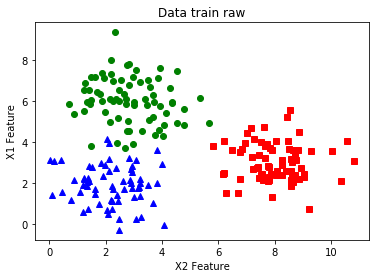

In [4]:
# Step 1: Generate and visualize training data
n_sample = 100
x_train, x_test, label_train, label_test = generate_data([2, 2], [8, 3], [3, 6], n_sample)
visualize_data(x_train, label_train, "Data train raw")

(210, 3)
(210,)


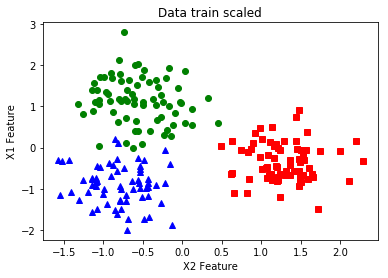

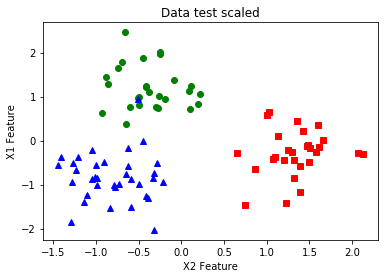

In [5]:
# Step 1b: Normalize Xs and re-visualize training data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train.shape)
print(label_train.shape)

visualize_data(x_train, label_train, "Data train scaled")
visualize_data(x_test, label_test, "Data test scaled")

In [6]:
# Step 2: Initialize Placeholders for input data
X = tf.placeholder(np.float32, [None, 3])
L = tf.placeholder(dtype=np.float32)
batch_size = tf.placeholder(np.float32)

In [7]:
### Step 3: Build up your first model
W = define_parameters()

cost = define_cost_func(X, W, L, batch_size)

In [8]:
# Step 4: Create optimizer
l_rate = 0.2
optimizer, initializer = define_optimizer(l_rate, cost)

# Train model

In [9]:
with tf.Session() as sess:
    sess.run(initializer)
    for i in range(50):
        _, train_cost = sess.run([optimizer, cost], feed_dict={X: x_train, L: np.eye(3)[label_train], batch_size: len(label_train)})
        
        w_op = sess.run(W)
        
#         draw_model(a_op, b_op, c_op)
#         visualize_data(x_train, label_train,"Step {}, loss = {:.4f}".format(i, train_cost))

    test_cost = sess.run(cost, feed_dict={X: x_test, L: np.eye(3)[label_test], batch_size: len(label_test)})
    print('Optimized variable: w_op = ', w_op)
#     draw_model(a_op, b_op, c_op)
#     visualize_data(x_test, label_test, "Final prediction cost {:.4f}".format(test_cost))

Optimized variable: w_op =  [[ 0.6697568   0.29356366 -1.0031658 ]
 [-0.11943013  0.6775717  -0.37618068]
 [ 2.2448802   0.5005424   0.16088271]]
